**Workshop** </br>

ดึงราคา Bitcoin ตั้งแต่วันที่ 1/1/2021 ถึง 1/1/2022 และสร้าง SMA สองเส้นตัดกัน(SMA12 และ เส้นSMA26) เมื่อเส้นเร็ว SMA12 ตัดขึ้นให้ทำการแสดงสัญญาณซื้อ และหากเส้น SMA26 ตัดลงให้แสดงสัญญาณขาย

## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf

import talib

In [29]:
raw_df = yf.download('BTC-USD', start='2021-01-01', end='2022-01-01')
raw_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299


## Create SMA

In [30]:
raw_df['sma_12'] = raw_df['Close'].rolling(12).mean()
raw_df['sma_26'] = raw_df['Close'].rolling(26).mean()

# Same above (optional)
# raw_df['ta_sma_12'] = talib.MA(raw_df['Close'], timeperiod=12)
# raw_df['ta_sma_26'] = talib.MA(raw_df['Close'], timeperiod=26)

raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901


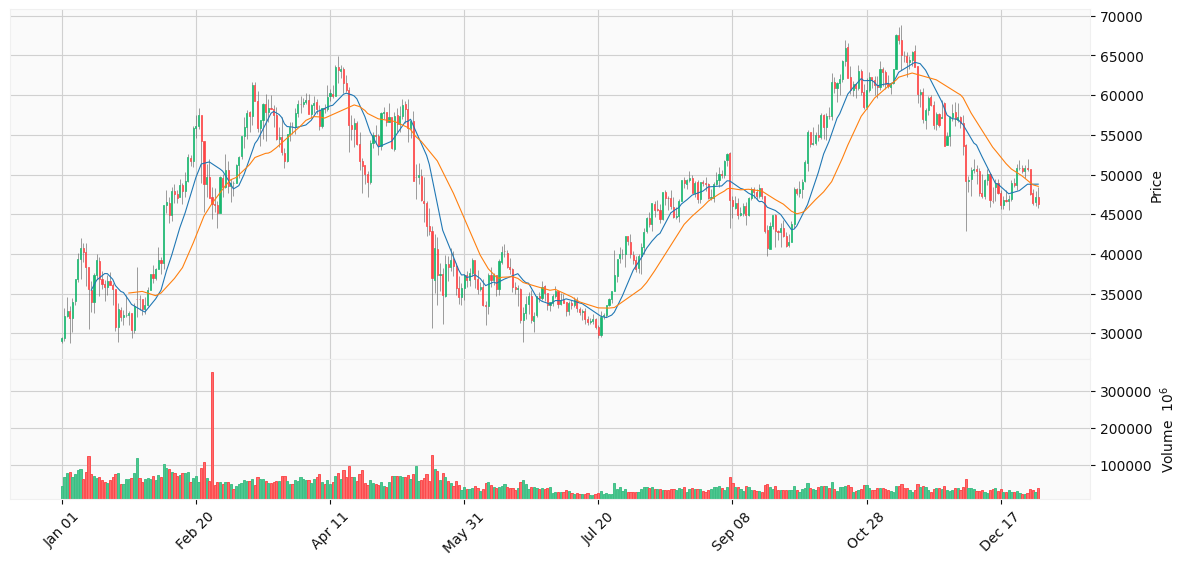

In [31]:
mpf.plot(raw_df, style='yahoo', type='candle', mav=(12, 26), volume=True, figsize=(15, 7))

In [32]:
raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901


## Create Trend and Signal

In [33]:
raw_df['trend'] = raw_df['sma_12'] > raw_df['sma_26']
raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True


In [34]:
raw_df['trend_shift'] = raw_df['trend'].shift(1)
raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend,trend_shift
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False


In [35]:
raw_df.loc[(raw_df.trend == True) & (raw_df.trend_shift == False),'action'] = 'buy'
raw_df.loc[(raw_df.trend == False) & (raw_df.trend_shift == True),'action'] = 'sell'
raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend,trend_shift,action
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False,False,NaN
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False,False,NaN
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False,buy


### Visualization

In [89]:
# 'col_signal' include buy and sell signal which we have to seperate the signal by our direction (side) that we pay attention.
# 'value' check the signal before add into the list

def mark_ticker(col_signal, col_price, direction):
    signal = []
    for date, value in col_signal.iteritems():
        # long side on DataFrame
        if direction == 'buy':
            if value == 'buy':
                signal.append(col_price[date] * 0.95)
            else:
                signal.append(np.nan)
        # short side on DataFrame
        elif direction == 'sell':
            if value == 'sell':
                signal.append(col_price[date] * 1.02)
            else:
                signal.append(np.nan)
    return signal

In [90]:
viz = [ mpf.make_addplot(mark_ticker(raw_df['action'], raw_df['Close'], 'buy') ,type='scatter',markersize=200,marker='^'),
        mpf.make_addplot(mark_ticker(raw_df['action'], raw_df['Close'], 'sell') ,type='scatter',markersize=200,marker='v')
        ]

/var/folders/6t/_xyw489d5jnd7011n2m_x_ch0000gn/T/ipykernel_15507/2950418684.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in col_signal.iteritems():


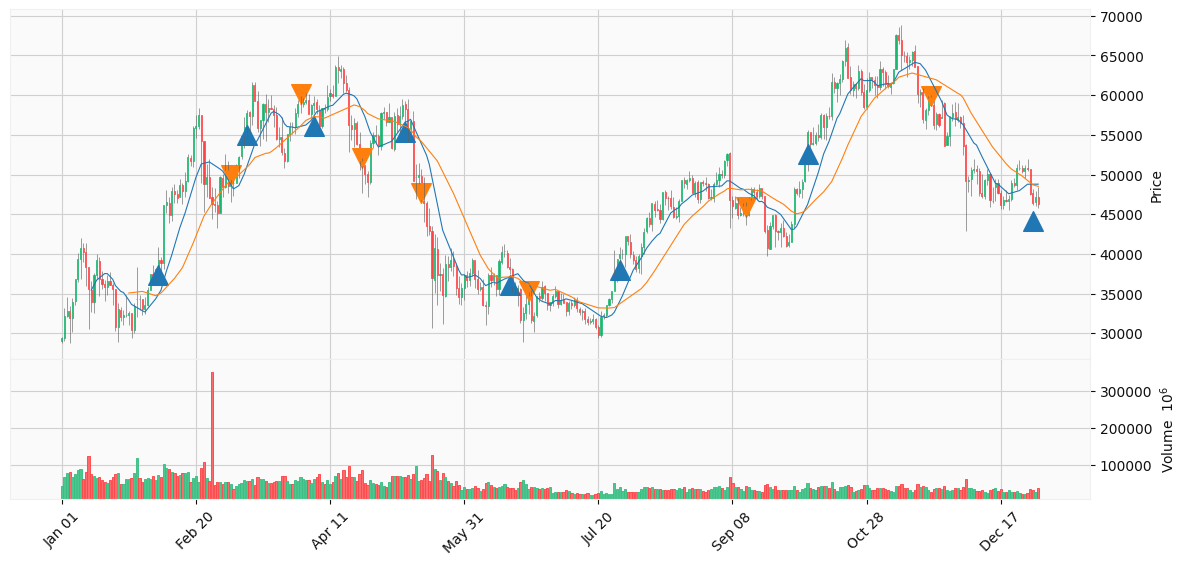

In [91]:
mpf.plot(raw_df, style='yahoo', type='candle', mav=(12, 26), volume=True, addplot=viz,figsize=(15, 7))